In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import io
import matplotlib.pyplot as plt
import math

   Location Letter     value
0         1      A  0.833258
1         1      A  0.679847
2         1      A  0.647164
3         1      A  0.734806
4         1      A  0.036985


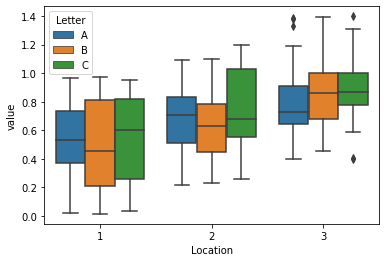

In [ ]:
data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
data2 = pd.DataFrame(np.random.rand(17,3)+0.2, columns=['A','B','C']).assign(Location=2)
data3 = pd.DataFrame(np.random.rand(17,3)+0.4, columns=['A','B','C']).assign(Location=3)

cdf = pd.concat([data1, data2, data3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
print(mdf.head())

#    Location Letter     value
# 0         1      A  0.223565
# 1         1      A  0.515797
# 2         1      A  0.377588
# 3         1      A  0.687614
# 4         1      A  0.094116

ax = sns.boxplot(x="Location", y="value", hue="Letter", data=mdf)    
plt.show()

In [3]:
path_data = "/home/leduin/Escritorio/Tesis/Resultados/Datos/"
algorithm = "aga"
parameter = "robots"
path_fig  = "/home/leduin/Escritorio/Tesis/Resultados/Imagenes/"
algorithm1 = "aga"
algorithm2 = "orca"

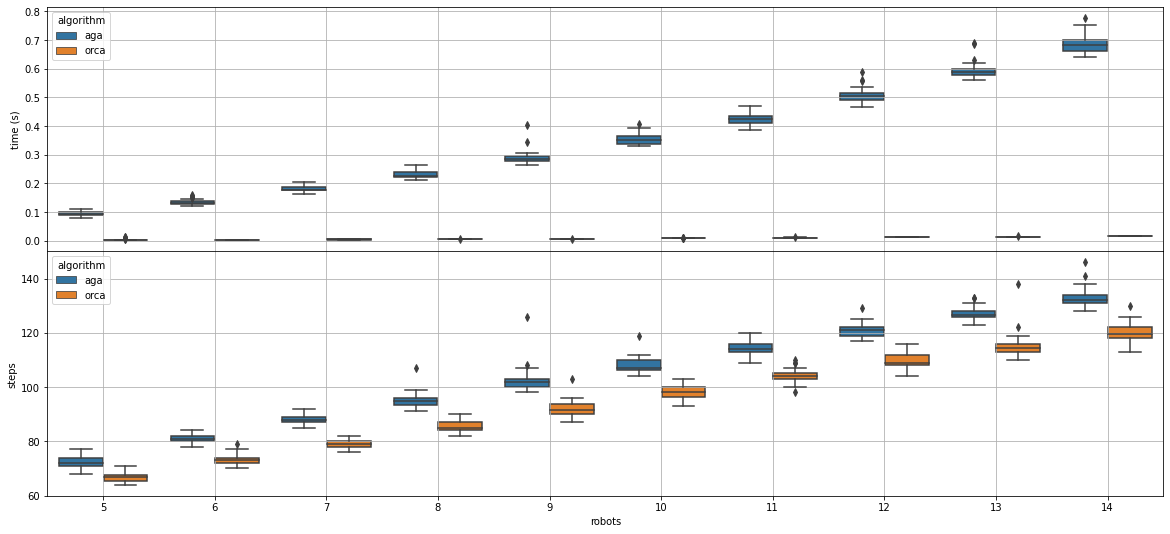

In [23]:
df1 = pd.read_csv(path_data+algorithm1+"/"+parameter+".csv")
df2 = pd.read_csv(path_data+algorithm2+"/"+parameter+".csv")

cdf = pd.concat([df1, df2])

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,9))
fig.subplots_adjust(hspace=0)

sns.boxplot(x=parameter, y='time', hue='algorithm', data=cdf, ax=axes[0])
sns.boxplot(x=parameter, y='steps', hue='algorithm', data=cdf, ax=axes[1])

axes[0].set_title('')
axes[1].set_title('')

axes[0].grid()
axes[1].grid()

axes[0].set_ylabel('time (s)')
axes[1].set_ylabel('steps')

plt.xlabel(parameter)

fig.suptitle('')
plt.savefig(path_fig+algorithm1+"_"+algorithm2+"_"+parameter+".svg")

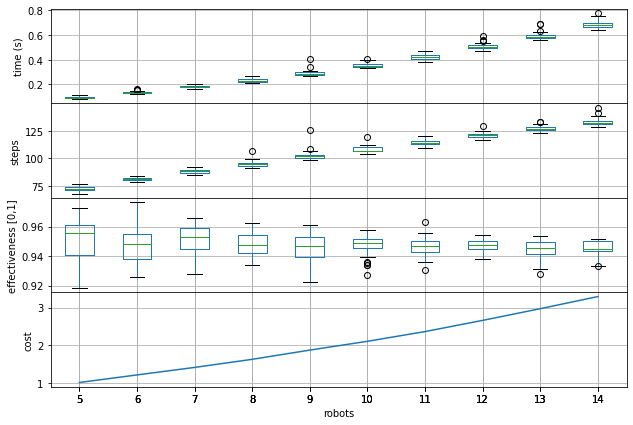

In [7]:
df = pd.read_csv(path_data+algorithm+"/"+parameter+".csv")

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,7))
fig.subplots_adjust(hspace=0)

df.boxplot(column='time', by=parameter, ax=axes[0])
df.boxplot(column='steps', by=parameter, ax=axes[1])
df.boxplot(column='effectiveness', by=parameter, ax=axes[2])

x = []
y = []
acc_tim = df.mean()["time"]
acc_stp = df.mean()["steps"]
acc_eff = df.mean()["effectiveness"]
for i in range(1,14):
    if (parameter == "deadlock_mov" or parameter == "movement"
        or parameter == "tolerance"):
        #if i < 11:
        temp_df = df.loc[df[parameter]==round(0.01*i,2)]
        #elif i > 10 and i < 19:
            #temp_df = df.loc[df[parameter]==round(0.1*((i+1)%10),2)]
    elif parameter == "robots":
        temp_df = df.loc[df[parameter]==(i+4)]
    else:
        temp_df = df.loc[df[parameter]==i]
    temp_tim = temp_df.mean()["time"]
    temp_stp = temp_df.mean()["steps"]
    temp_eff = temp_df.mean()["effectiveness"]
    temp_sum = (temp_tim/acc_tim)+(temp_stp/acc_stp)+((1-temp_eff)/acc_eff)
    x.append(i)
    y.append(temp_sum)
axes[3].plot(x,y)
axes[3].grid()

axes[0].set_title('')
axes[1].set_title('')
axes[2].set_title('')

axes[0].set_ylabel('time (s)')
axes[1].set_ylabel('steps')
axes[2].set_ylabel('effectiveness [0,1]')
axes[3].set_ylabel('cost')

plt.xlabel(parameter)

fig.suptitle('')
plt.savefig(path_fig+algorithm+"_"+parameter+".svg")

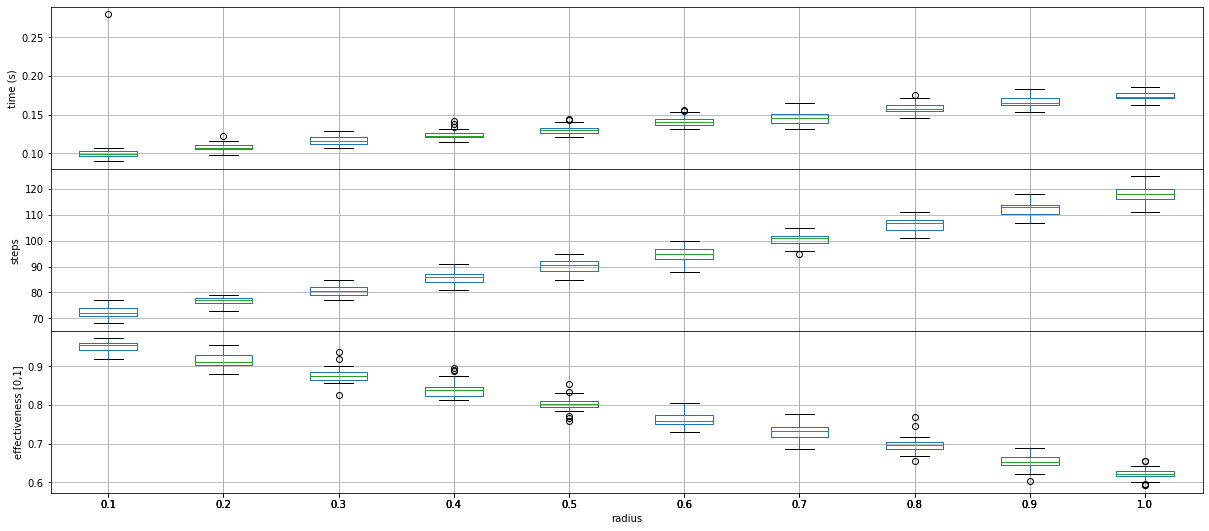

In [5]:
df = pd.read_csv(path_data+algorithm+"/"+parameter+".csv")

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,9))
fig.subplots_adjust(hspace=0)

df.boxplot(column='time', by='radius', ax=axes[0])
df.boxplot(column='steps', by='radius', ax=axes[1])
df.boxplot(column='effectiveness', by='radius', ax=axes[2])

axes[0].set_title('')
axes[1].set_title('')
axes[2].set_title('')

axes[0].set_ylabel('time (s)')
axes[1].set_ylabel('steps')
axes[2].set_ylabel('effectiveness [0,1]')

plt.xlabel("radius")

fig.suptitle('')
plt.savefig("/home/leduin/Escritorio/Tesis/Resultados/Imagenes/aga_radius.svg")

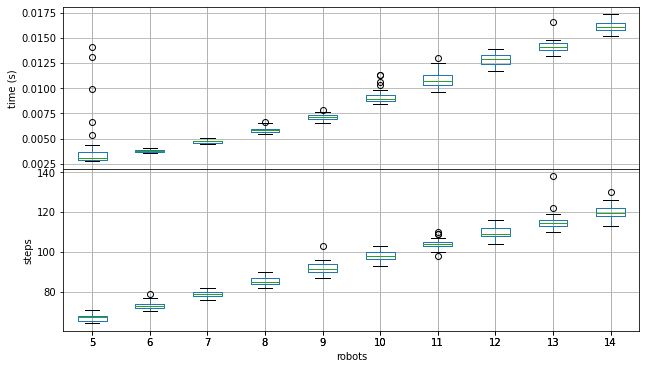

In [24]:
df = pd.read_csv("/home/leduin/Escritorio/Tesis/Resultados/Datos/orca/orca.csv")

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,6))
fig.subplots_adjust(hspace=0)

df.boxplot(column='time', by='robots', ax=axes[0])
df.boxplot(column='steps', by='robots', ax=axes[1])

axes[0].set_title('')
axes[1].set_title('')

axes[0].set_ylabel('time (s)')
axes[1].set_ylabel('steps')

plt.xlabel("robots")

fig.suptitle('')
plt.savefig("/home/leduin/Escritorio/Tesis/Resultados/Imagenes/orca_figure.svg")